Random Forest Classifier Practice
===
巨量資料分析導論 Homework 2

B036060017 資管四年級 謝威廷, 2018/3/27

## Introduction
- Using the RandomForest Classifier to predict the iris dataset.
- Observe the prediction outcome with confusion matrix.
- Visualize the feature impoortance calculated by model.

## Load the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Iris Dateset

In [3]:
from sklearn.datasets import load_iris
dataset = load_iris()
iris = pd.DataFrame(dataset.data, columns = dataset.feature_names)
iris['target'] = dataset.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


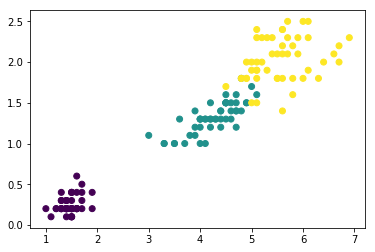

In [4]:
plt.scatter(iris.iloc[:, 2], iris.iloc[:, 3], c = iris['target'])

## Split the Dataset to Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], 
                                                    test_size = 0.2,
                                                    random_state = 10,
                                                    shuffle = True)

print('Training : ', X_train.shape, ' Testing : ', X_test.shape)

Training :  (120, 4)  Testing :  (30, 4)


In [21]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 500,
                                  random_state = 10,
                                  verbose = 1)
model_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=10, verbose=1, warm_start=False)

## Prediction Performance

In [22]:
from sklearn.metrics import accuracy_score

train_predict = model_rf.predict(X_train)
test_predict = model_rf.predict(X_test)

train_acc = accuracy_score(y_train, train_predict)
test_acc = accuracy_score(y_test, test_predict)

print('Train Acc : ', train_acc, ", Test Acc : ", test_acc)

Train Acc :  1.0 , Test Acc :  0.966666666667


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


## Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, test_predict)

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  7]])

## Feature Importance Provided by RandomForest

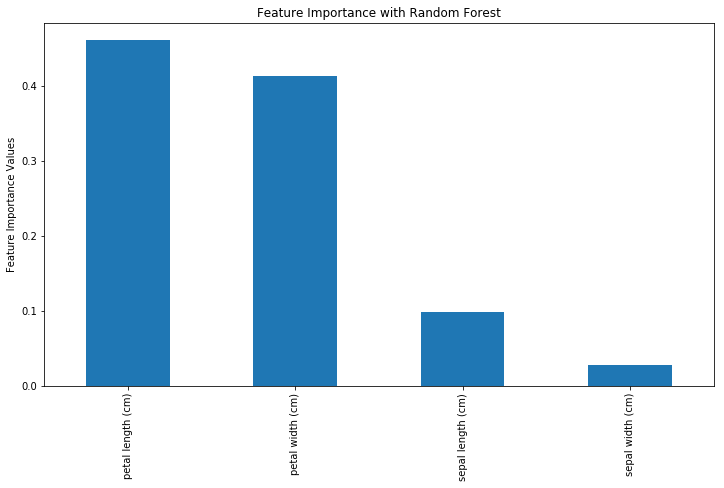

In [24]:
imp_features = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
imp_features.plot(kind='bar', title='Feature Importance with Random Forest', figsize=(12,8))
plt.ylabel('Feature Importance Values')
plt.subplots_adjust(bottom=0.25)
plt.show()